In [26]:
# groupId - Players team ID
# matchId - Match ID
# assists - Number of assisted kills. The killed is actually scored for the another teammate.
# boosts - Number of boost items used by a player. These are for example: energy dring, painkillers, adrenaline syringe.
# damageDealt - Damage dealt to the enemy
# DBNOs - Down But No Out - when you lose all your HP but you’re not killed yet. All you can do is only to crawl.
# headshotKills - Number of enemies killed with a headshot
# heals - Number of healing items used by a player. These are for example: bandages, first-aid kits
# killPlace - Ranking in a match based on kills.
# killPoints - Ranking in a match based on kills points.
# kills - Number of enemy players killed.
# killStreaks - Max number of enemy players killed in a short amount of time.
# longestKill - Longest distance between player and killed enemy.
# matchDuration - Duration of a mach in seconds.
# matchType - Type of match. There are three main modes: Solo, Duo or Squad. In this dataset however we have much more categories.
# maxPlace - The worst place we in the match.
# numGroups - Number of groups (teams) in the match.
# revives - Number of times this player revived teammates.
# rideDistance - Total distance traveled in vehicles measured in meters.
# roadKills - Number of kills from a car, bike, boat, etc.
# swimDistance - Total distance traveled by swimming (in meters).
# teamKills - Number teammate kills (due to friendly fire).
# vehicleDestroys - Number of vehicles destroyed.
# walkDistance - Total distance traveled on foot measured (in meters).
# weaponsAcquired - Number of weapons picked up.
# winPoints - Ranking in a match based on won matches.

In [74]:
#로컬용
import pandas as pd
df=pd.read_csv('/새 폴더/train_V2.csv') #PUBG의 데이터를 불러왔다
print(df.shape) #df의 행렬크기

(4446966, 29)


In [28]:
# #코랩용
# import pandas as pd
# df=pd.read_csv('/content/drive/MyDrive/AI/train_V2.csv') #PUBG의 데이터를 불러왔다
# print(df.shape) #df의 행렬크기
# df

In [29]:
df['winPlacePerc'].value_counts() 
#목표로할 타겟값을 카운트 해보았으나 수많은 0~1사이의 값으로 되어있다
#고로 상위 10퍼센트 안에 드는걸 예측하기

0.0000    220505
1.0000    127573
0.5000     55065
0.3333     42508
0.6667     38112
           ...  
0.1286         1
0.3065         1
0.1346         1
0.6833         1
0.0845         1
Name: winPlacePerc, Length: 3000, dtype: int64

In [30]:
df['winPlacePerc']=[1 if x>=0.9 else 0 for x in df['winPlacePerc']] #승률이 0.9이상이면 1 아니면 0

In [31]:
df['winPlacePerc'].value_counts(normalize=True)# 0.894723 vs 0.105277

0    0.894483
1    0.105517
Name: winPlacePerc, dtype: float64

In [32]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


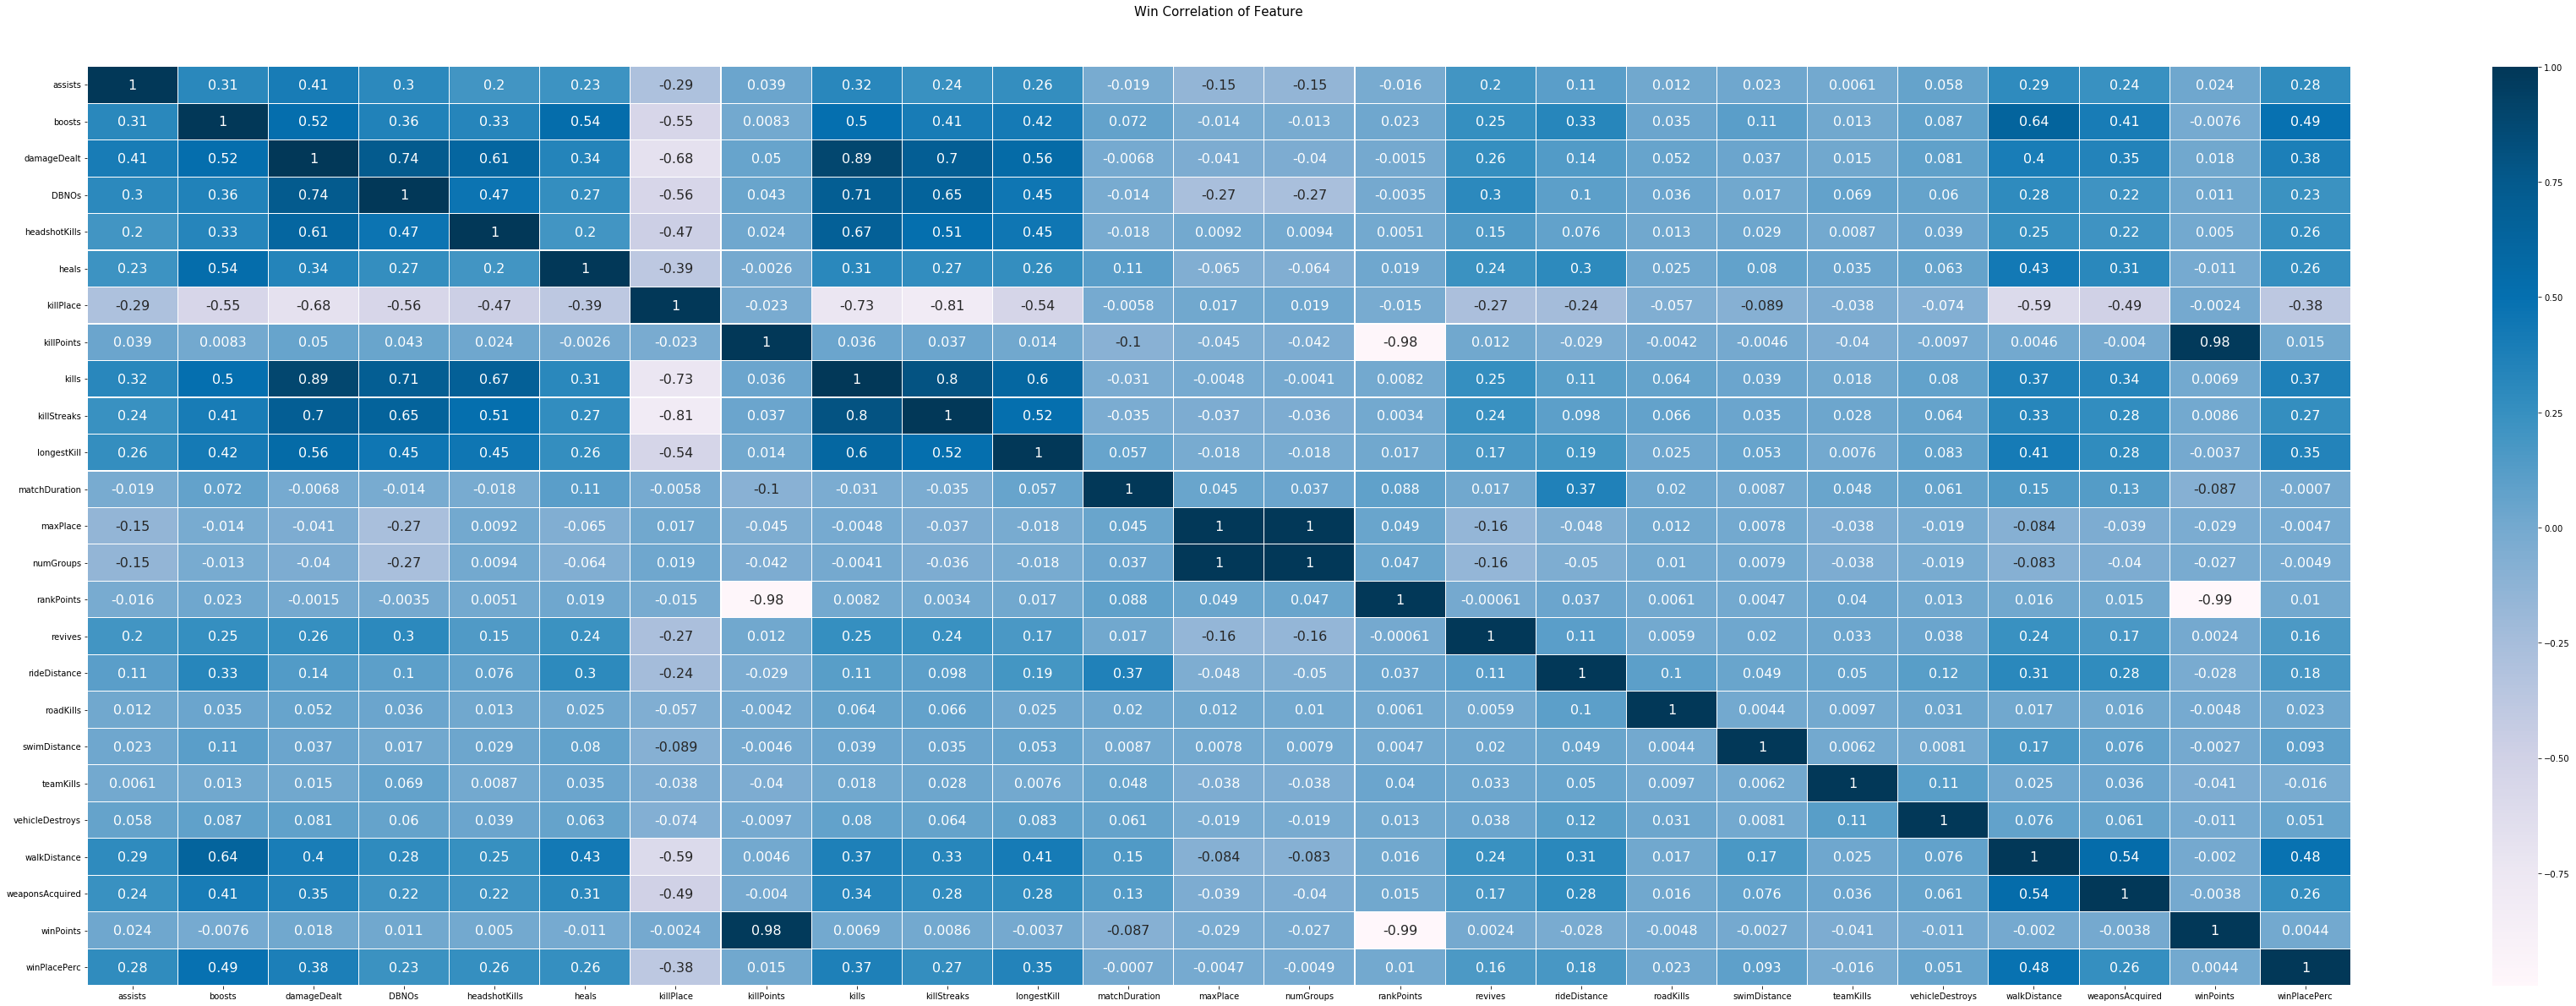

In [33]:
import matplotlib.pyplot as plt 
import seaborn as sns
dfcor=df.drop(['Id','groupId','matchId','matchType'],axis=1) #corr을보려고 문자열로된것들 빼냄
colormap=plt.cm.PuBu
plt.figure(figsize=(60,20))
plt.title('Win Correlation of Feature',y=1.05,size=15)
sns.heatmap(dfcor.astype(float).corr(),linewidths=0.1,vmax=1.0,square=False,cmap=colormap,linecolor='white',annot=True,annot_kws={'size':16})
#corr heatmap

Corr를 보면 타겟값과 높은 상관관계를 가진 walk distance와 boosts  
음의 상관관계가 큰 killplace  
max place와 numGroup은 사실상 같은 피쳐다   
ranking points , winpoints, killpoints는 1,-0.99 뭔가 이상하다

In [34]:
kw=df[['killPlace','winPlacePerc']]
kw.sort_values(by='winPlacePerc',ascending=False).head(10)
#kp를 죽은 플레이어 or 살은 플레이어의 수를 생각해 wpp기준으로 정렬해봤으나 별다른 소득이없었다
#여기서 간과한 것이있으니 이 자료에 matchtype이라는게있었다

,killPlace,winPlacePerc
1304057,34,1
3544670,6,1
1540583,2,1
2677977,11,1
1540585,1,1
1540588,13,1
1540591,20,1
1008155,22,1
4033474,49,1
1008153,24,1


In [35]:
set(df['matchType']) 
#게임 모드라고보면될것같다 solo=>혼자 duo=>2인팀 squad=>4인팀 fpp=>1인칭 normal=>rank가 아님
#??? crashfpp??? flarefpp??? 뭐야요?? 이게뭐에ㅐ요?

{'crashfpp',
 'crashtpp',
 'duo',
 'duo-fpp',
 'flarefpp',
 'flaretpp',
 'normal-duo',
 'normal-duo-fpp',
 'normal-solo',
 'normal-solo-fpp',
 'normal-squad',
 'normal-squad-fpp',
 'solo',
 'solo-fpp',
 'squad',
 'squad-fpp'}

In [36]:
#여튼 내 예측은 죽은 적 숫자혹은 떨어진 팀 숫자정도
kw=df[['killPlace','winPlacePerc','matchType']]
kw.sort_values(by='winPlacePerc',ascending=False).head(10)

,killPlace,winPlacePerc,matchType
1304057,34,1,squad
3544670,6,1,squad-fpp
1540583,2,1,solo
2677977,11,1,squad-fpp
1540585,1,1,duo-fpp
1540588,13,1,squad-fpp
1540591,20,1,squad
1008155,22,1,squad
4033474,49,1,squad
1008153,24,1,squad


아1니 뭔데 ㅋㅋㅋ    
결국 울면서 구글링을 해봤고   
Kill place는 킬 순위라고 한다  
그렇다면 이해가능 킬순위라 낮은 숫자가 높다고 볼 수있다

In [37]:
mn=df[['maxPlace','numGroups','matchType']]
mn.head(10)
#max place와 numgruops이 조금씩 다른걸 볼 수 있는는데 max place는 꼴등일때의 순위 numgroups는 실제 참여 팀
#고로 듀오나 스쿼드에선 숫자가 부족하게 참여하는 경우와 공통적으로 들어왔다가 시작하자마자 나간경우가있어서 실제 참여그룹숫자가다르다
#사실상 두 피쳐는 하나는 없어도 된다고 본다 실제값인 numgrups만있으면 될것같다

,maxPlace,numGroups,matchType
0,28,26,squad-fpp
1,26,25,squad-fpp
2,50,47,duo
3,31,30,squad-fpp
4,97,95,solo-fpp
5,28,28,squad-fpp
6,28,28,squad-fpp
7,96,92,solo-fpp
8,28,27,squad
9,29,27,squad


캐글 원본에 있는설명을 참고한 결과  
ranking points  =랭킹 ELO의 개념  
winpoints  =승리 횟수로 판단한 ELO의 개념  
killpoints =킬 수로 산정한 ELO의 개념. 만약 rankPoints에 -1 이외의 값이 있다면, killPoints의 0값은 값이 없는 것으로 처리됨.
사실상 지금의 타겟은 그 판에서 찾는거라 예전의 기록인 Elo들은 필요가없다

In [38]:
match=df['matchType'].value_counts().reset_index()
#위에서 한번 matchtype을 봤지만 알수없는 부분이있어 어느정도 차지하는지 알고싶어짐


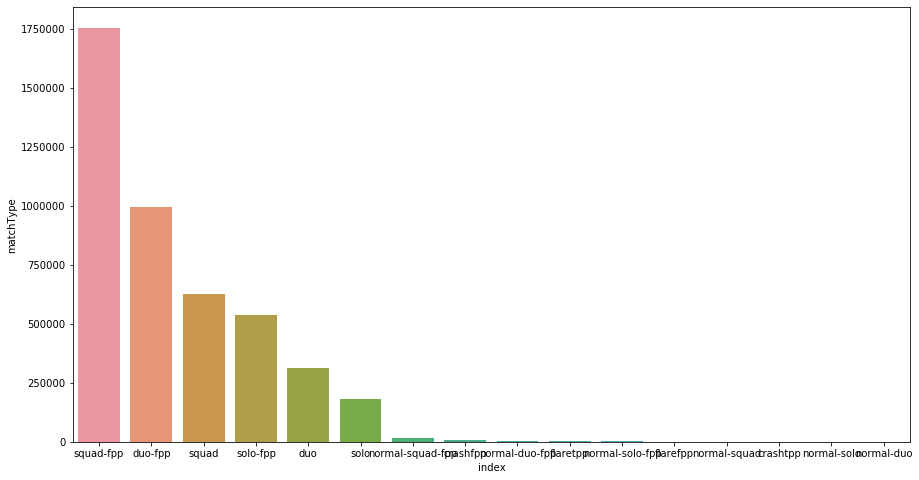

In [39]:
plt.figure(figsize=(15,8))
sns.barplot(
    data=match,
    x='index',
    y='matchType'

)
plt.show()#matchType을 그래프로 봄

바 플롯을 그려보니 노멀게임과 flare crach는 전체데이터중에 아주 일부만 차지하고있다   
대부분은 스쿼드와 듀오

In [40]:
set(df['matchType'])#matchType 피처에 뭐뭐있는지(unique) 봄


{'crashfpp',
 'crashtpp',
 'duo',
 'duo-fpp',
 'flarefpp',
 'flaretpp',
 'normal-duo',
 'normal-duo-fpp',
 'normal-solo',
 'normal-solo-fpp',
 'normal-squad',
 'normal-squad-fpp',
 'solo',
 'solo-fpp',
 'squad',
 'squad-fpp'}

In [41]:
mc=df[(df['matchType']=='crashfpp') | (df['matchType']=='crashtpp')].sort_values(by='winPlacePerc',ascending=False)
mc.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.0,6658.000000,6658.000000,...,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.0,6658.000000
mean,0.194653,1.129769,90.689604,0.454341,0.074497,1.192400,44.582157,0.0,0.784770,0.520126,...,0.056774,1857.818144,0.315861,1.473929,0.071193,0.077501,672.188906,1.526735,0.0,0.102884
std,0.499321,1.516019,123.275655,0.744982,0.292885,2.345113,26.381236,0.0,1.321673,0.749323,...,0.268674,2261.542761,0.816933,18.253867,0.267473,0.327959,606.663281,1.154944,0.0,0.303830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.425000,1.000000,0.0,0.000000
50%,0.000000,0.000000,52.920000,0.000000,0.000000,0.000000,44.000000,0.0,0.000000,0.000000,...,0.000000,544.550000,0.000000,0.000000,0.000000,0.000000,481.850000,1.000000,0.0,0.000000
75%,0.000000,2.000000,132.875000,1.000000,0.000000,1.000000,66.000000,0.0,1.000000,1.000000,...,0.000000,3658.000000,0.000000,0.000000,0.000000,0.000000,932.325000,2.000000,0.0,0.000000
max,5.000000,16.000000,1296.000000,6.000000,3.000000,26.000000,100.000000,0.0,13.000000,8.000000,...,8.000000,9696.000000,10.000000,521.700000,2.000000,5.000000,3147.000000,9.000000,0.0,1.000000


In [42]:
dropmc=df.drop(mc.index)
dropmc.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.440308e+06,4.440308e+06,4.440308e+06,4.440308e+06,4.440308e+06,4.440308e+06,4.440308e+06,4.440308e+06,4.440308e+06,4.440308e+06,...,4.440308e+06,4.440308e+06,4.440308e+06,4.440308e+06,4.440308e+06,4.440308e+06,4.440308e+06,4.440308e+06,4.440308e+06,4.440308e+06
mean,2.338736e-01,1.106873e+00,1.307772e+02,6.581807e-01,2.270480e-01,1.370414e+00,4.760387e+01,5.057633e+02,9.249933e-01,5.439909e-01,...,1.648208e-01,6.042388e+02,3.027718e-03,4.513874e+00,2.379745e-02,7.813872e-03,1.154941e+03,3.663687e+00,6.073695e+02,1.055211e-01
std,5.886948e-01,1.716076e+00,1.708349e+02,1.146211e+00,6.024709e-01,2.680444e+00,2.746428e+01,6.276702e+02,1.558763e+00,7.109125e-01,...,4.723879e-01,1.496121e+03,6.515054e-02,3.051665e+01,1.671885e-01,9.176731e-02,1.184004e+03,2.456587e+00,7.398817e+02,3.072237e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.550000e+02,2.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,8.430000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.865000e+02,3.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,4.242500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.978000e+03,5.000000e+00,1.495000e+03,0.000000e+00
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


longestKill에서 max값을보면 이상한 점을볼수있는데  
crash 모드에서는 102.500000	
crash를 제외한 모드에서는 1.094000e+03로  10배의 가까운 차이   
또한 평균 게임 시간도 893.123010과 1.580536e+03로 두배에 가까운 차이를 보인다   
구글링으로 모드를 살펴본결과 crash는 이벤트 모드로 근접전 모드이며 게임시간이 거의 절반이라고한다   
마찬가지로 flare모드도 이벤트 모드이다  
오디널, 원핫 뭐가 나을지 사실 모르겠다 정규 모드를 제외하고 이벤트모드는 아예 다른 양상이라 이벤트모드를 제거하는 방향으로 갈 생각이다 
또한 행이 너무 많아서그런가 계속 세션다운되서 노말 지워버릴거임

In [43]:
duo=df['matchType']=='duo'
duofpp=df['matchType']=='duo-fpp'
solo=df['matchType']=='solo'
solofpp=df['matchType']=='solo-fpp'
squad=df['matchType']=='squad'
squadfpp=df['matchType']=='squad-fpp'
df=df[duo|duofpp|solo|solofpp|squad|squadfpp]
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0


In [44]:
wd=df[df['rideDistance']>df['walkDistance']]
wd  
#walking distance라는게 전체이동거리인지 진짜로 걸어간 거리인지 의문이생겼다
#rideDistance가 walkdistance보다 높은게 없다면 walkdistance는 전체이동거리일것이다
#결과는 ride와 walk는 따로따로이다

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0,0,0.00,0,0,1089.0,6,1500,0
12,ce4f6ac165705e,da24cdb91969cc,535b5dbd965a94,0,0,0.000,0,0,0,37,...,0,6639.0,0,0.00,0,0,2784.0,6,0,1
17,92022479b92ce7,2f2c33f548c4b9,07948d723b9c0f,0,3,254.300,0,0,12,13,...,0,2367.0,0,15.29,0,0,1787.0,3,0,0
20,02ace8c6e58461,a4bc548028f800,80f2b8448e474b,0,4,269.100,0,1,8,18,...,1,2734.0,0,0.00,0,0,1794.0,5,0,0
22,9b2961d4d51f91,799d0a4d61dc3c,e833ca2282169d,0,1,192.300,1,2,3,15,...,0,2332.0,0,0.00,0,0,1264.0,4,1494,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446940,3eefd3ee81154a,19b7a730468b55,31045b7b933f3d,0,1,0.000,0,0,1,58,...,0,2728.0,0,0.00,0,0,1362.0,6,0,0
4446942,2c9f1610de0ecd,d64a0663e96058,5c9254fa96f53e,0,4,724.700,6,4,14,1,...,3,5076.0,0,0.00,0,0,2162.0,8,0,1
4446944,914aec03b107db,a8c5116da13d88,02dd2c1a0b34de,0,0,175.000,0,1,0,29,...,0,2532.0,0,0.00,0,0,1349.0,5,0,0
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.000,0,0,0,74,...,0,1292.0,0,0.00,0,0,1019.0,3,1507,0


In [75]:
df.isnull().sum()#결측치 확인해보니 단 하나가있다

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [76]:
df[df['winPlacePerc'].isnull()]#에러가 난 행을확인결과 뭔가 에러가 난 것 같다 제거하기로함

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [47]:
df=df.dropna()

In [48]:
df[df.duplicated()] #중복값은 없다 

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [49]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [50]:
#squrd duo같은경우 업혀가는 팀원처리할것

In [51]:
# max place 제거
# ranking points , winpoints,killpoints 제거
#ID 계열은 필요없음
#kills=>에 따라 killplace가 바뀌기때문에필요하지않을까?
#자꾸 다운되서 df나누는걸 없애기로함
#matchId 다시 살리기로함( 자꾸 세션다운되서 여기서 수정함)
df1=df.drop(['Id','maxPlace','rankPoints','killPoints','winPoints'],axis=1)
df1

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,...,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
0,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,0,...,26,0,0.0000,0,0.000,0,0,244.80,1,0
1,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,...,25,0,0.0045,0,11.040,0,0,1434.00,5,0
2,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,...,47,0,0.0000,0,0.000,0,0,161.80,2,0
3,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,...,30,0,0.0000,0,0.000,0,0,202.70,3,0
4,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,1,...,95,0,0.0000,0,0.000,0,0,49.75,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,0,...,28,0,1292.0000,0,0.000,0,0,1019.00,3,0
4446962,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,...,93,0,0.0000,0,0.000,0,0,81.70,6,0
4446963,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,...,28,0,0.0000,0,2.184,0,0,788.70,4,0
4446964,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,2,...,25,2,0.0000,0,0.000,0,0,2748.00,8,0


In [52]:
df1['headpro']=df1['headshotKills']/df1['kills'] #헤드샷 확률
df1=df1.fillna(0) #0으로 나눴을때 NaN이 되므로 0으로 변경

In [53]:
df1['totaldistance']=df1['swimDistance']+df1['walkDistance']+df1['rideDistance']#전체이동거리


In [54]:
df1.isnull().sum()
#계속 세션다운되면서 문제를 겪었는데 아무래도 다음셀에서 각이동거리/전체이동거리에서 0으로 나눠
#결측치를 생성하게되면서 문제가 일어나는 것 같다 잠수타는걸 아예 생각도 못하고있었다 결측치가생기고 나중에 또 결측치로 나누니까 에러가나지ㅠ

groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
numGroups          0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPlacePerc       0
headpro            0
totaldistance      0
dtype: int64

In [55]:
df1['w/t']=df1['walkDistance']/df1['totaldistance']#전체이동거리중 걸음 비중
df1['s/t']=df1['swimDistance']/df1['totaldistance']#전체이동거리중 수영 비중
df1['r/t']=df1['rideDistance']/df1['totaldistance']#전체이동거리중 차량 비중
df1['ttdistgame']=df1['winPlacePerc']

In [56]:
df1=df1.fillna(0)#결국 전체이동거리가 0이라 0으로 채웠음

In [57]:
df1[['winPlacePerc','w/t','s/t','r/t','rideDistance','swimDistance','walkDistance']].corr()
#타겟에 걸음거리가 높을수록 타겟에 높은값이나오는데 실제로 걸음의 비중을 보면 탈것이 없이 걷기만 한경우 오히려 타겟 확률이 떨어지는걸 알 수 있다(탈것을구하지못하면 이기기힘들다)
#걸음거리가 높을수록 타겟이 높게나오는건 당연하다 죽으면 더이상 이동을 못하니까
#매치ID를 드랍했는데 다시 필요 하게될것같아 이전 드랍에서 다시 살렸음

,winPlacePerc,w/t,s/t,r/t,rideDistance,swimDistance,walkDistance
winPlacePerc,1.000000,-0.089188,0.009466,0.128569,0.181471,0.094119,0.484280
w/t,-0.089188,1.000000,-0.094306,-0.837958,-0.730897,-0.065222,-0.166071
s/t,0.009466,-0.094306,1.000000,-0.019977,-0.017120,0.344071,0.003122
r/t,0.128569,-0.837958,-0.019977,1.000000,0.869094,0.041106,0.276449
rideDistance,0.181471,-0.730897,-0.017120,0.869094,1.000000,0.050321,0.312708
swimDistance,0.094119,-0.065222,0.344071,0.041106,0.050321,1.000000,0.168152
walkDistance,0.484280,-0.166071,0.003122,0.276449,0.312708,0.168152,1.000000


In [58]:
df3=df1.groupby('matchId')[['totaldistance']].sum().reset_index().reset_index(drop=True)
df3 #matchid로 묶어서 그 게임당 전체 이동량을 체크
df3.columns=['matchId','totaldistt']
df3

,matchId,totaldistt
0,0000a43bce5eec,128240.1005
1,0000eb01ea6cdd,114562.4143
2,0002912fe5ed71,265333.2250
3,0003b92987589e,107361.7086
4,0006eb8c17708d,110554.8393
...,...,...
47181,fffd74b5150cb4,84496.1070
47182,fffe53015be300,190181.7264
47183,fffe562611d981,88175.6780
47184,fffe721f841f85,111931.0570


In [59]:
# #3시간 3분걸리고 런타임 끊김..
# ind=0
# for x in df1['matchId']:        
#     b=df3[df3['matchId']==x]    
#     df1['ttdistgame'][ind]=df1['totaldistance'][ind]/b.iloc[0][8]
#     ind=ind+1
    


In [60]:
df4=pd.merge(df1,df3,how='left',on='matchId')

In [61]:
df4['ttdistgame']=df4['totaldistance']/df4['totaldistt']#그 게임전체의 이동거리중 이 플레이어의 지분 인데 또 결측치를만들어서 제거하기로함


In [62]:
df4.sort_values(by='ttdistgame') 
#전체이동거리가 0이 나온 게임이존재한다 뭔가 이상해서 살펴보니 numGroups가 1~2 이런식으로있다 4명씩하는 스쿼드의 경우에도몇명빠져도
#보통 20팀 이상이 나온다 그런데 솔로에서 1~2명인걸보니 매칭 오류가 일어난거같다 시작도안하고 터진경우..
#이건 무작정 결측치 처리를 할게아니라 저런게임은 지워주는게 맞다고 본다 (시작도 안한게임)

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,...,walkDistance,weaponsAcquired,winPlacePerc,headpro,totaldistance,w/t,s/t,r/t,ttdistgame,totaldistt
3338965,e96a3b2431751b,d4f6aeb9880a83,0,0,0.0,0,0,0,65,0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,247490.8033
4088745,99b9f4c3fdc81e,7b9310cd454dce,0,0,0.0,0,0,0,95,0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,70684.6827
1390356,6f7038df5baae4,07d83d35abbf12,0,0,0.0,0,0,0,94,0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,92519.8700
821928,a4d85e9569c26e,73c9481567ab30,0,0,0.0,0,0,0,89,0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,88992.5290
4088696,1a162cc8516eb0,42425e0d9fbbe7,0,0,0.0,0,0,0,91,0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,122703.3210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406331,4b12676589b3ab,519ccfec17a205,0,0,212.2,0,0,0,15,0,...,0.0,2,0,0.0,0.0,0.0,0.0,0.0,NaN,0.0000
4407889,d82026025a97b6,5372f28f26e755,0,0,146.0,0,0,0,10,0,...,0.0,2,0,0.0,0.0,0.0,0.0,0.0,NaN,0.0000
4407976,9d010232fd5264,2c7ee565a600c6,0,0,0.0,0,0,0,15,0,...,0.0,1,0,0.0,0.0,0.0,0.0,0.0,NaN,0.0000
4408001,b70109a45eb127,6db87452a2db21,0,0,0.0,0,0,0,2,0,...,0.0,3,1,0.0,0.0,0.0,0.0,0.0,NaN,0.0000


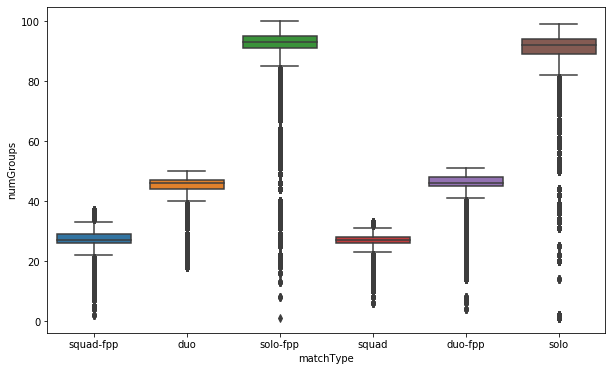

In [63]:
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 6]
sns.boxplot(x='matchType',
            y='numGroups',
            data=df4)
plt.show()
#결측치 문제를 확인후 혹시나 하여 이상치를 체크하기 시작했다 
#bar plot으로 확인결과 많은 수의 아웃라이어를 확인할수있다
#이상치의 경우도 100명이서 하는게임을 막 20명 30명이 한다면 처음에 목표로했던 
#'정상적인'게임에서 승률을 예측하는데 방해가 되어 제거하기로했다, 
#당연히 못하는 사람도있을것이지만 내가 생각하는 정상적인게임의 기준은=> 인원수
#여기서 문제가 matchType마다 numGroups의 숫자가 달라서 따로따로 이상치를 제거한 후 다시 합칠것이다

In [64]:
df4solo=df4[(df4['matchType']=='solo')|(df4['matchType']=='solo-fpp')]

In [65]:
df4duo=df4[(df4['matchType']=='duo')|(df4['matchType']=='duo-fpp')]

In [66]:
df4squad=df4[(df4['matchType']=='squad')|(df4['matchType']=='squad-fpp')]

In [67]:
import numpy as np
def kickout(df, column):  
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)
  quantile_50 = np.percentile(df[column].values, 50)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*1.5
  
  lowest = quantile_25 - IQR_weight#하한 컷
  highest = quantile_75 + IQR_weight#상한 컷
  print(quantile_25,quantile_50,quantile_75)#수치확인용
  print(lowest,highest)#수치확인용
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

In [68]:
outlies=kickout(df4solo,'numGroups')
df4solo.drop(outlies, axis=0, inplace=True) #아웃라이어 제거

91.0 93.0 95.0
85.0 101.0


c:\users\elije\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [69]:
outlied=kickout(df4duo,'numGroups')
df4duo.drop(outlied, axis=0, inplace=True) #아웃라이어 제거

45.0 46.0 48.0
40.5 52.5


c:\users\elije\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [70]:
outlieq=kickout(df4squad,'numGroups')
df4squad.drop(outlieq, axis=0, inplace=True) #아웃라이어 제거

26.0 27.0 28.0
23.0 31.0


c:\users\elije\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [71]:
df4=pd.concat([df4squad,df4duo])
df4=pd.concat([df4,df4solo])
df4 #다시 합쳐줌

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,...,walkDistance,weaponsAcquired,winPlacePerc,headpro,totaldistance,w/t,s/t,r/t,ttdistgame,totaldistt
0,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,0,...,244.80,1,0,0.0,244.8000,1.000000,0.00000,0.000000,0.002505,97713.5878
1,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,...,1434.00,5,0,0.0,1445.0445,0.992357,0.00764,0.000003,0.006806,212305.6148
3,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,...,202.70,3,0,0.0,202.7000,1.000000,0.00000,0.000000,0.001641,123545.8180
5,289a6836a88d27,bac52627a12114,0,0,100.00,1,1,0,44,1,...,34.70,1,0,1.0,34.7000,1.000000,0.00000,0.000000,0.000326,106505.3570
6,2c485a1ad3d0f1,a8274e903927a2,0,0,0.00,0,0,0,96,0,...,13.50,1,0,0.0,13.5000,1.000000,0.00000,0.000000,0.000121,111581.9747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411683,8248fa2552457b,88c002b589d411,0,0,203.50,0,0,0,32,1,...,1559.00,5,0,0.0,1559.0000,1.000000,0.00000,0.000000,0.007095,219717.9840
4411687,c33e793af077f9,deb3a91c03d0f3,0,0,30.10,0,0,0,58,0,...,2146.00,6,0,0.0,2146.0000,1.000000,0.00000,0.000000,0.009863,217578.4060
4411692,ac3f1b4a56e5ad,2f3b1af94739b3,0,0,22.68,0,0,0,89,0,...,40.25,1,0,0.0,40.2500,1.000000,0.00000,0.000000,0.000480,83768.0605
4411695,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,...,81.70,6,0,0.0,81.7000,1.000000,0.00000,0.000000,0.000878,93012.0850


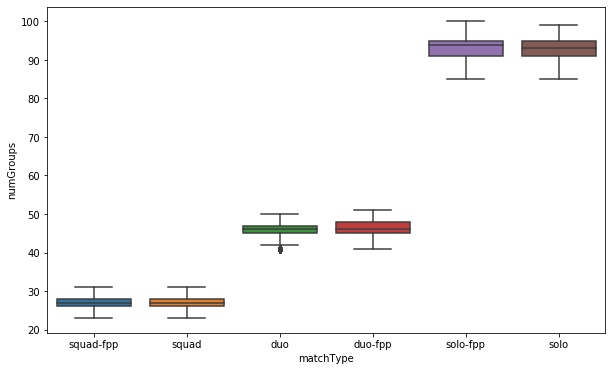

In [72]:
plt.rcParams['figure.figsize'] = [10, 6]
sns.boxplot(x='matchType',
            y='numGroups',
            data=df4) #제거됐는지 확인해봄
         
plt.show() #duo에 조금 찌끄럭지가 남음

In [73]:
df4duo[df4duo['numGroups']<40.5] #duo 와 duo fpp를 묶어서 duo에는 조금 이상치가있는것처럼 보이나 괜찮다고 판단

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,...,walkDistance,weaponsAcquired,winPlacePerc,headpro,totaldistance,w/t,s/t,r/t,ttdistgame,totaldistt


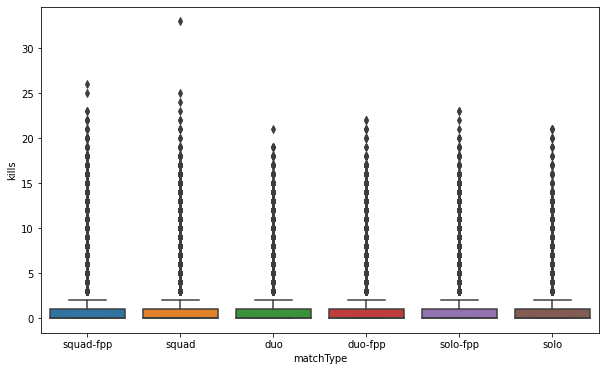

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 6]
sns.boxplot(x='matchType',
            y='kills',
            data=df4)
plt.show() #핵으로 볼수도있는 너무 높은 킬체크 뭔가 엄청 높은 킬들이 보인다 100명중에 혼자 30명이상 죽인건 좀..?
#핵인지 아닌지는 모르겠으나 전적사이트 랭커기준으로는 혼자 10킬 내외를 하는 사람들을 볼 수 있었다
#그래서 핵의 기준을 킬은 높으나 => 이동거리가 적은 사람으로 생각한다

In [ ]:
df4[(df4['kills']>5)&(df4['totaldistance']<300)]
#킬과 이동거리의 기준을 정확히 잡을수 없었다 iqr기준으로는 킬이 2.5이상 (말도안됨) 이동거리 하한은 -가 되어버린다
#아주 우연히 적과 몰려서 초반부터 엄청싸우는 경우가 없지않다는걸 알고있기때문에 섣불리 지울수없었다
#사실 확실한 방법이있는데 핵의 특징은 항상 이긴다는것으로 승률 1로 조건을 두면 알 수 있겠지만 그렇게 되면 leakage로 볼 수도 있어
#핵 검거는 포기하기로하고 아주 운좋게 흥한 판이라고 생각하기로했다

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,matchType,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,headpro,totaldistance,w/t,s/t,r/t,ttdistgame,totaldistt
40419,1083b9ae4cb02f,13f7d90966134f,0,0,285.2,4,0,3,2,6,2,90.980,1885,squad-fpp,27,1,0.0,0,0.0000,0,0,292.1,2,0,0.000000,292.1000,1.000000,0.000000,0.0,0.001408,207505.8200
50463,caa21bfe47cf50,306338ea7499ae,1,1,659.1,5,2,3,2,7,3,54.750,1461,squad-fpp,28,1,0.0,0,0.0000,0,0,299.2,6,0,0.285714,299.2000,1.000000,0.000000,0.0,0.002605,114871.1460
53207,6d8d2c8e78a303,83d3bb3ffeaf03,0,2,721.1,5,0,1,1,6,3,41.420,1372,squad,29,0,0.0,0,0.0000,0,0,292.0,3,0,0.000000,292.0000,1.000000,0.000000,0.0,0.002755,105994.2770
63786,2d5796691af2c2,a8ca13c577f135,0,0,539.7,6,2,0,2,6,2,14.910,1334,squad-fpp,29,1,0.0,0,0.6599,0,0,257.6,3,0,0.333333,258.2599,0.997445,0.002555,0.0,0.001976,130705.6949
72388,e07a61d1c27f4d,bd8e1f77084e03,0,3,571.2,4,1,1,2,6,2,18.500,1367,squad,26,0,0.0,0,0.0000,0,0,274.4,3,0,0.166667,274.4000,1.000000,0.000000,0.0,0.002987,91871.6660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3751156,e42661c8e992cd,edb4d184b24b60,0,3,449.5,0,0,1,3,6,2,34.820,1356,solo-fpp,96,0,0.0,0,0.0000,0,0,267.2,4,0,0.000000,267.2000,1.000000,0.000000,0.0,0.003145,84973.0595
3872234,edd3be29708d01,a9f85a14870cd3,0,1,598.7,0,3,7,2,6,1,87.050,1397,solo-fpp,95,0,0.0,0,0.0000,0,0,264.2,4,0,0.500000,264.2000,1.000000,0.000000,0.0,0.003401,77678.1270
3997327,f451e3e3f9bc2b,958caef4edd9a5,0,2,766.2,0,1,0,1,8,4,8.705,1354,solo-fpp,97,0,0.0,0,0.0000,0,0,234.1,2,0,0.125000,234.1000,1.000000,0.000000,0.0,0.002364,99007.0577
4307163,02a1afaf93ddf7,799c24d9cf6c34,1,2,636.5,0,1,0,4,6,2,57.300,1365,solo-fpp,96,0,0.0,0,0.0000,0,0,241.1,3,0,0.166667,241.1000,1.000000,0.000000,0.0,0.002469,97659.1770


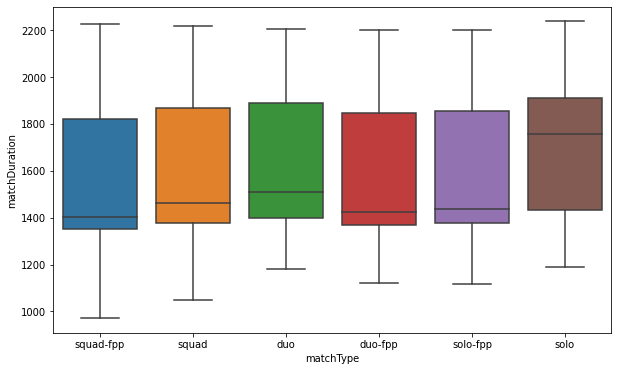

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 6]
sns.boxplot(x='matchType',
            y='matchDuration',
            data=df4)
plt.show() #이상게임이나 핵이존재하면 적은 게임시간이 존재할수도있다 시간은 멀쩡하게나온다..

In [ ]:
df4=df4.drop([ㅇ],axis=1)

In [ ]:
df4['madmax']=[1 if (x>0.5)&(y>=1) else 0 for x,y in zip(df4['r/t'],df4['roadKills'])] #매드맥스!

In [ ]:
df4['goldengoblin']=[1 if (x==0)&(y>=5) else 0 for x,y in zip(df4['kills'],df4['weaponsAcquired'])] #황금고블린

In [ ]:
df4['gummoonso']=[1 if (x>=1)&(y>=1) else 0 for x,y in zip(df4['vehicleDestroys'],df4['kills'])] #검문소

In [ ]:
df4['ralf']=[1 if (x<10)&(y>=1) else 0 for x,y in zip(df4['longestKill'],df4['kills'])] #주먹왕 랄프

In [ ]:
df4['Strongback']=[1 if (x>=1)&(y==0) else 0 for x,y in zip(df4['DBNOs'],df4['kills'])] #강해져서 돌아와라

In [ ]:
df4['yumi']=[1 if (x>=2)&(y==0) else 0 for x,y in zip(df4['assists'],df4['kills'])] #유미(라면냥이)

In [ ]:
df4['headhunter']=[1 if (x>=0.4)&(y>=3) else 0 for x,y in zip(df4['headpro'],df4['kills'])]#헤드헌터

In [ ]:
#꽂혀서 너무많이했네
df4.to_csv('/content/drive/MyDrive/AI/df4.csv')

In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df4,train_size=0.8,random_state=2)

In [ ]:
train,vali=train_test_split(train,train_size=0.8,random_state=2)

In [ ]:
train.shape,vali.shape,test.shape

((2746525, 31), (686632, 31), (858290, 31))

In [ ]:
target='winPlacePerc'
y_train=train[target]
X_train=train.drop(target,axis=1)
y_vali=vali[target]
X_vali=vali.drop(target,axis=1)
y_test=test[target]
X_test=test.drop(target,axis=1)

In [ ]:
X_train.shape,X_vali.shape,X_test.shape,y_train.shape,y_vali.shape,y_test.shape

((2746525, 30), (686632, 30), (858290, 30), (2746525,), (686632,), (858290,))

In [ ]:
!pip install category_encoders
!pip install eli5

     |████████████████████████████████| 80 kB 4.3 MB/s 
     |████████████████████████████████| 106 kB 5.1 MB/s 


In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import eli5
from eli5.sklearn import PermutationImportance

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# pipe = Pipeline([
#     ('prepro', OrdinalEncoder()),
#     ('rf', RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)) 
# ])

In [ ]:
# pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('prepro',
                 Pipeline(memory=None,
                          steps=[('ordinalencoder',
                                  OrdinalEncoder(cols=['groupId', 'matchType'],
                                                 drop_invariant=False,
                                                 handle_missing='value',
                                                 handle_unknown='value',
                                                 mapping=[{'col': 'groupId',
                                                           'data_type': dtype('O'),
                                                           'mapping': 9e511a02ddc2e0          1
058d14944a223c          2
3ec7912515c86d          3
3ecffa70c1bb6f          4
5cae0bfa7e60b8          5
                   ...   
4dbb3bb0cea7c9    1585...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
  

In [ ]:
# pipe.score(X_vali, y_vali)

0.9206314299362687

In [ ]:
permuter = PermutationImportance(
    pipe.named_steps['rf'], # model
    scoring='f1', # metric
    n_iter=3, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

In [ ]:
X_vali_transformed = pipe.named_steps['prepro'].transform(X_vali)

In [ ]:
permuter.fit(X_vali_transformed, y_vali)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [ ]:
feature_names = X_vali.columns.tolist()

In [ ]:
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.3357 ± 0.0009,ttdistgame
0.1155 ± 0.0017,boosts
0.0697 ± 0.0015,longestKill
0.0357 ± 0.0009,assists
0.0315 ± 0.0003,damageDealt
0.0194 ± 0.0012,kills
0.0172 ± 0.0014,weaponsAcquired
0.0160 ± 0.0004,matchDuration
0.0066 ± 0.0012,killStreaks
0.0031 ± 0.0004,revives


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
ordenc=OrdinalEncoder()
X_train_en=ordenc.fit_transform(X_train)
X_vali_en=ordenc.transform(X_vali)

In [ ]:
# xgb=XGBClassifier(learning_rate =0.1,
#               base_score=0.894723,
#               n_estimators=1500,
#               max_depth=5,
#               min_child_weight=1,
#               gamma=0,
#               scale_pos_weight=1 ) #xgbpipe                                                                              
# eval_set = [(X_train_en, y_train), 
#             (X_vali_en, y_vali)]             

# xgb.fit(X_train_en, y_train, 
#           eval_set=eval_set,
#           eval_metric='error',
#           early_stopping_rounds=50
#          ) 

# #early stopping 결과 233이나왔다

[0]	validation_0-error:0.894997	validation_1-error:0.89485
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.894997	validation_1-error:0.89485
[2]	validation_0-error:0.894997	validation_1-error:0.89485
[3]	validation_0-error:0.894997	validation_1-error:0.89485
[4]	validation_0-error:0.354374	validation_1-error:0.354598
[5]	validation_0-error:0.178115	validation_1-error:0.178679
[6]	validation_0-error:0.135661	validation_1-error:0.136517
[7]	validation_0-error:0.112537	validation_1-error:0.112994
[8]	validation_0-error:0.102273	validation_1-error:0.102764
[9]	validation_0-error:0.093776	validation_1-error:0.094149
[10]	validation_0-error:0.089583	validation_1-error:0.090029
[11]	validation_0-error:0.087036	validation_1-error:0.087523
[12]	validation_0-error:0.085319	validation_1-error:0.085775
[13]	validation_0-error:0.083705	validation_1-error:0.084064

XGBClassifier(base_score=0.894723, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
y_tr_pre=xgb.predict(X_train_en)
f1_score(y_train,y_tr_pre) #f1_score 값은 0.56

0.5638496323253858

In [ ]:
from scipy.stats import randint,uniform

In [ ]:
pipe=make_pipeline(OrdinalEncoder(),
                   XGBClassifier(
                       base_score=0.894723,
                       n_estimators=233,
                       gamma=0,                    
                        subsample= 0.8,
                        colsample_bytree= 0.8,                       
                        learning_rate=0.3,
                        scale_pos_weight=1))

In [ ]:
params1 = {           
    'min_child_weight': randint(1,6),   
    'max_depth': randint(3,10)        
    }
randomcv = RandomizedSearchCV(xgb, param_distributions=params1, n_iter=50,cv=2,
                                   scoring='f1_weighted', n_jobs=-1, verbose=3, random_state=2 )
randomcv.fit(X_train,y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
#Print out best parameters
print(random_search.best_params_)
print(grid_search.best_params_)
#Print out scores on validation set
print(random_search.score(X_test,y_test))
print(grid_search.score(X_test,y_test))

In [ ]:
params1 = {
    'base_score'=0.894723,
    'n_estimators'=233,    
    'min_child_weight': [1,5,10],
    'gamma': [0.5,1,1.5,2,5],
    'subsample': [0.6,0.8,1.0],
    'colsample_bytree': [0.6,0.8,1.0],
    'max_depth': [3,4,5,6],
    'learning_rate':[0.3,0.5,0.8],
    'scale_pos_weight':sum(negative instances) / sum(positive instances),        
    }
randomcv = RandomizedSearchCV(xgb, param_distributions=params1, n_iter=100,cv=2,
                                   scoring='f1_weighted', n_jobs=-1, verbose=3, random_state=2 )